In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Set visualization style
sns.set_style("whitegrid")

In [40]:
df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [42]:
print(df.describe())

                 id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       instant_bookable  Construction year          price    service fee  \
count     102494.000000      102385.000000  102352.000000  102326.000000   
mean           0.497785        2012.487464     625.293536     125.026924   
std            0.499998           5.765556     331.671614      66.325739   
min            0.000000        2003.000000      50.000000      10.000000   
25%            0

In [43]:
#Standardizing Column Names (Replace spaces and uppercase with snake_case)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [44]:
# Fill missing host_identity_verified with 'unknown'
df['host_identity_verified'].fillna('unknown', inplace=True)

# Fill missing host_name with 'No Name'
df['host_name'].fillna('No Name', inplace=True)


In [45]:
# Fill missing review-related columns with 0, as NaN likely means no reviews
df['number_of_reviews'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'].fillna('1970-01-01', inplace=True)

# Fill missing review_rate_number with the median, as this is a quality metric
median_rate = df['review_rate_number'].median()
df['review_rate_number'].fillna(median_rate, inplace=True)

# Drop columns with too many unique/missing values or low relevance for core analysis
cols_to_drop = ['id', 'host_id', 'country', 'country_code', 'license', 'house_rules']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"\nDropped columns: {cols_to_drop}")


Dropped columns: ['id', 'host_id', 'country', 'country_code', 'license', 'house_rules']


In [46]:
def clean_numeric_column(series):
    # Remove non-numeric characters like '$' and ','
    if series.dtype == 'object':
        series = series.astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    # Convert to numeric, setting errors='coerce' to turn problematic values into NaN
    return pd.to_numeric(series, errors='coerce')

df['price'] = clean_numeric_column(df['price'])
df['service_fee'] = clean_numeric_column(df['service_fee'])

In [47]:
df.dropna(subset=['price', 'service_fee'], inplace=True)
df = df[(df['price'] > 10) & (df['price'] < df['price'].quantile(0.99))]
df = df[(df['service_fee'] >= 0)]

# Convert construction_year to integer, filling missing with median for imputation
df['construction_year'].fillna(df['construction_year'].median(), inplace=True)
df['construction_year'] = df['construction_year'].astype(int)

In [48]:
df.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,0.0,strict,Private room,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,0.0,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,1.0,flexible,Private room,2005,620.0,124.0,3.0,0.0,1970-01-01,0.00,5.0,1.0,352.0
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,1.0,moderate,Entire home/apt,2005,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,0.0,moderate,Entire home/apt,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0


In [49]:
df.shape

(101008, 20)

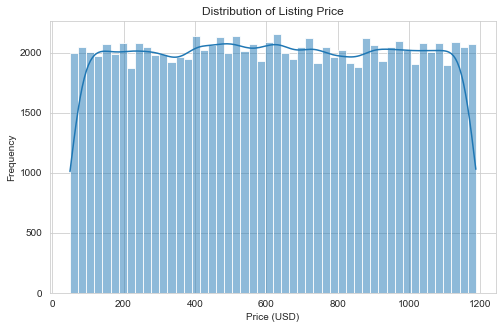

In [50]:
# Assuming the actual column name is 'price' 

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=50) # Increased bins for better detail
plt.title('Distribution of Listing Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

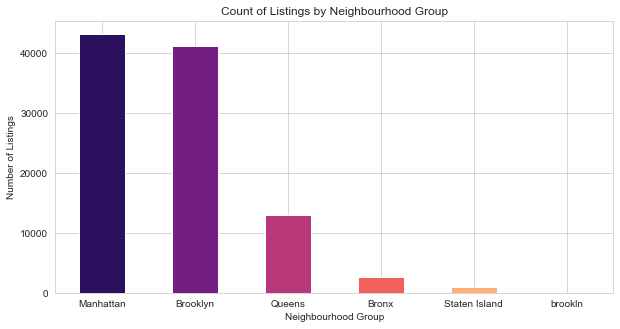

In [51]:
# Geographical Distribution (Neighbourhood Group)
plt.figure(figsize=(10, 5))
df['neighbourhood_group'].value_counts().plot(kind='bar', color=sns.color_palette("magma", 5))
plt.title('Count of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()

In [52]:
# Create the aggregation
top_demand_neighbourhoods = df.groupby('neighbourhood').agg(
    Total_Reviews=('number_of_reviews', 'sum'),
    Avg_Review_Rate=('review_rate_number', 'mean'),
    Avg_Price=('price', 'mean')
).sort_values(by='Total_Reviews', ascending=False).head(10)

print("\n3.3.1 Top 10 Neighbourhoods by Total Reviews (Demand Hotspots):")

# RENDER THE STYLED TABLE DIRECTLY
top_demand_neighbourhoods.style.format({
    'Avg_Review_Rate': '{:.2f}',
    'Avg_Price': '${:.2f}'
})


3.3.1 Top 10 Neighbourhoods by Total Reviews (Demand Hotspots):


,Total_Reviews,Avg_Review_Rate,Avg_Price
neighbourhood,,,
Bedford-Stuyvesant,269016.000000,3.28,$615.15
Williamsburg,188226.000000,3.25,$618.79
Harlem,177717.000000,3.23,$620.26
Bushwick,122374.000000,3.28,$625.90
Hell's Kitchen,110664.000000,3.28,$616.26
East Village,96837.000000,3.26,$613.32
Crown Heights,88384.000000,3.29,$611.14
East Harlem,82337.000000,3.32,$623.63
Upper West Side,76754.000000,3.24,$610.20


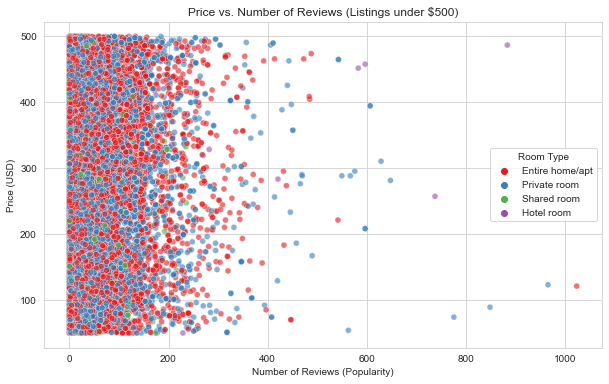

In [53]:
# Assuming 'price' and 'number_of_reviews' are the correct column names.

# To handle extreme prices and get a clear visual, let's filter prices below a certain cap (e.g., $500).
df_filtered = df[df['price'] < 500].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='number_of_reviews',
    y='price',
    data=df_filtered,
    alpha=0.6, # Use transparency to show density
    hue='room_type', # Add room type for deeper insight
    palette='Set1'
)
plt.title('Price vs. Number of Reviews (Listings under $500)')
plt.xlabel('Number of Reviews (Popularity)')
plt.ylabel('Price (USD)')
plt.legend(title='Room Type')
plt.show()

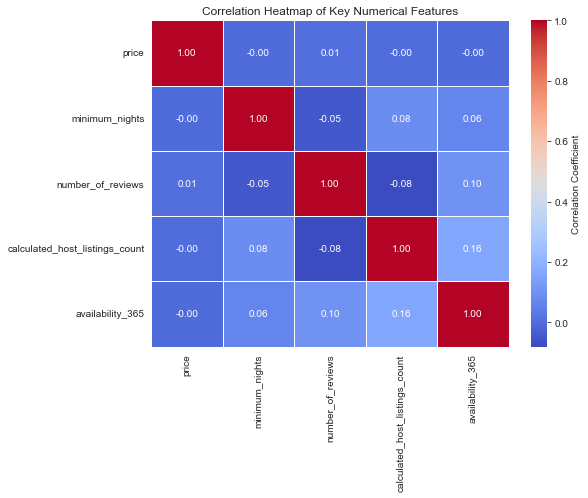

In [54]:
import numpy as np

# Select relevant numerical columns
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
corr_df = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_df, 
    annot=True, # Show the correlation values
    cmap='coolwarm', 
    fmt=".2f", # Format to 2 decimal places
    linewidths=.5, 
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

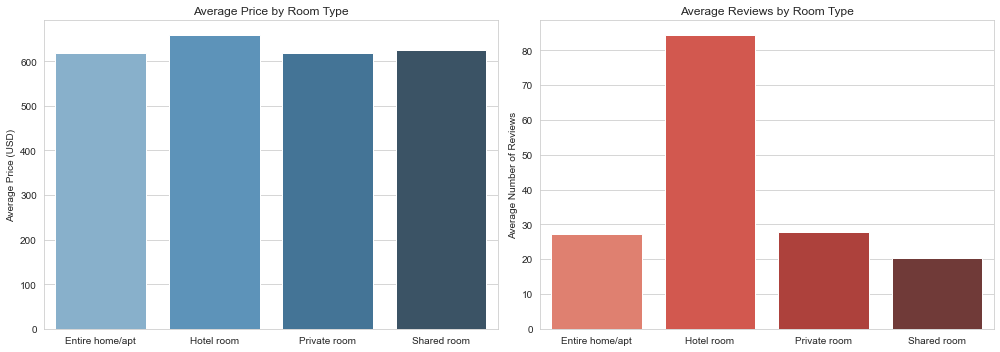

In [55]:
# Group data by room type and calculate means
room_type_summary = df.groupby('room_type')[['price', 'number_of_reviews']].mean().reset_index()
room_type_summary.rename(columns={'number_of_reviews': 'Avg_Reviews'}, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Average Price
sns.barplot(x='room_type', y='price', data=room_type_summary, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Price by Room Type')
axes[0].set_ylabel('Average Price (USD)')
axes[0].set_xlabel('')

# Plot 2: Average Reviews
sns.barplot(x='room_type', y='Avg_Reviews', data=room_type_summary, ax=axes[1], palette='Reds_d')
axes[1].set_title('Average Reviews by Room Type')
axes[1].set_ylabel('Average Number of Reviews')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()